In [22]:
import traytable as tt
import matplotlib.pyplot as plt
import pandas as pd

The package comes with a sample screen, which you can use for test purposes:

In [2]:
print(samplescreen)

{'row': 'protein', 'col': 'PEG', 'maxwell': 'H6', 'screenstatics': {'construct': 'wt DHFR', 'buffer': 'imidazole'}, 'tray1': {'traystatics': {'date': '2021-01-01', 'pH': 5.4, 'additive': 'NaOAc'}, 'A': 4.0, 'B': 6.0, 'C': 8.0, 'D': 10.0, 'E': 12.0, 'F': 14.0, 'G': 16.0, 'H': 18.0, '1': 16.0, '2': 17.0, '3': 18.0, '4': 19.0, '5': 20.0, '6': 21.0}, 'tray2': {'traystatics': {'date': '2021-01-03', 'pH': 5.6, 'other': 'humid day'}, 'A': 10.0, 'B': 11.0, 'C': 12.0, 'D': 13.0, 'E': 14.0, 'F': 15.0, 'G': 16.0, 'H': 17.0, '1': 15.0, '2': 16.0, '3': 17.0, '4': 18.0, '5': 19.0, '6': 20.0}, 'tray3': {'traystatics': {'date': '2021-01-04', 'pH': 5.6, 'other': 'humid day'}, 'A': 11.0, 'B': 12.0, 'C': 13.0, 'D': 14.0, 'E': 15.0, 'F': 16.0, 'G': 17.0, 'H': 18.0, '1': 15.0, '2': 16.0, '3': 17.0, '4': 18.0, '5': 19.0, '6': 20.0}}


For now, however, let's build up a simple screen from sratch.

First, initialize the screen with `newscreen()`. This function requires that you specify
 - the parameter that varies by row 
 - the parameter that varies by column
 - the plate shape, in the form of a "max well", e.g. the well in the bottom right corner of the plate.
 
Note that `row` refers to the parameter encoded by the row name; this is the parameter that is the same within a row, rather than the parameter that varies across the row. Likewise for columns.

Finally, whatever additional named arguments you pass to `newscreen()` become "screen static" global parameters that apply to all wells in all trays in the screen. A common example might be the protein construct, or a name for the screen.

In [23]:
myscreen = newscreen(row = 'protein', col = 'PEG', maxwell = 'H6', construct = 'HEWL')
print(myscreen)

{'row': 'protein', 'col': 'PEG', 'maxwell': 'H6', 'screenstatics': {'construct': 'HEWL'}}


Now let's make a tray. Like with `newscreen()`, `newtray()` will parse any additional named arguments as "tray static" parameters that apply to all wells in the tray. A common example might be the date the tray was set, or a buffer or additive that is the same across the plate.

In [24]:
myscreen = newtray(myscreen, 'tray1', date = '2021-01-01', buffer = 'HEPES', pH = 5.8)

The last thing to do is input the actual varying conditions across the tray, which we do via the `setrows()` and `setcols()` methods. For both of these methods, if you pass two parameters after the screen and tray, they are treated as the start and end of an evenly spaced gradient. If you pass only one parameter, it must be a list specifying a value for every row/column. Below, `tray1` is made using even gradients, and `tray2` is set with an irregular screen.

In [25]:
myscreen = setrows(myscreen, 'tray1', 4, 18) # evenly vary from 6 to 18 mg/ml protein over 8 rows
myscreen = setcols(myscreen, 'tray1', 21, 26) # evenly vary from 21 to 26 % PEG over 6 columns

# set row/column values explicitly
myscreen = newtray(myscreen, 'tray2', date = '2021-01-02', buffer = 'HEPES', pH = 6.0, additive = 'NaOAc')
myscreen = setrows(myscreen, 'tray2', [6, 7, 8, 9, 12, 15, 16, 17]) 
myscreen = setcols(myscreen, 'tray2', [21, 21.5, 22.5, 23.5, 26, 27])

print(myscreen)

{'row': 'protein', 'col': 'PEG', 'maxwell': 'H6', 'screenstatics': {'construct': 'HEWL'}, 'tray1': {'traystatics': {'date': '2021-01-01', 'buffer': 'HEPES', 'pH': 5.8}, 'A': 4.0, 'B': 6.0, 'C': 8.0, 'D': 10.0, 'E': 12.0, 'F': 14.0, 'G': 16.0, 'H': 18.0, '1': 21.0, '2': 22.0, '3': 23.0, '4': 24.0, '5': 25.0, '6': 26.0}, 'tray2': {'traystatics': {'date': '2021-01-02', 'buffer': 'HEPES', 'pH': 6.0, 'additive': 'NaOAc'}, 'A': 6, 'B': 7, 'C': 8, 'D': 9, 'E': 12, 'F': 15, 'G': 16, 'H': 17, '1': 21, '2': 21.5, '3': 22.5, '4': 23.5, '5': 26, '6': 27}}


### Logging hits!
Our two trays have some crystals! We can log wells with good crystals via the `well()` function. `well()` takes information from most general to most specific - start with the screen, then tray, then well. Then, include a short string to describe crystal quality, along with any other named parameters (perhaps a more verbose description, or a number of crystals.

For all but the first call to `well()`, don't forget `old_df=df` to concatenate the new results with the old results.

In [32]:
df = well(myscreen, 'tray1', 'A4', 'good', quantity = 3)
df = well(myscreen, 'tray1', 'B4', 'needles', quantity = 2, old_df=df)
df = well(myscreen, 'tray1', 'B2', 'good', quantity = 1, note = "chunkier than usual", old_df=df)

In [33]:
df

,protein,PEG,quality,date,buffer,pH,construct,tray,well,quantity,note
0,4.0,24.0,good,2021-01-01,HEPES,5.8,HEWL,tray1,A4,3,NaN
1,6.0,24.0,needles,2021-01-01,HEPES,5.8,HEWL,tray1,B4,2,NaN
2,6.0,22.0,good,2021-01-01,HEPES,5.8,HEWL,tray1,B2,1,chunkier than usual


The `well()` function uses the tray and well to look up all the data you've logged in your screens.

If you have many wells, all of the same quality, you can log them all at once:

In [34]:
df = well(myscreen, 'tray2', ['A3', 'A5', 'B2', 'B3'], 'needles', old_df=df)
df = well(myscreen, 'tray2', ['A1', 'A2', 'B1'], 'good', old_df=df, note='borderline')
df

,protein,PEG,quality,date,buffer,pH,construct,tray,well,quantity,note,additive
0,4.0,24.0,good,2021-01-01,HEPES,5.8,HEWL,tray1,A4,3.0,NaN,NaN
1,6.0,24.0,needles,2021-01-01,HEPES,5.8,HEWL,tray1,B4,2.0,NaN,NaN
2,6.0,22.0,good,2021-01-01,HEPES,5.8,HEWL,tray1,B2,1.0,chunkier than usual,NaN
3,6,22.5,needles,2021-01-02,HEPES,6.0,HEWL,tray2,A3,NaN,NaN,NaOAc
4,6,26.0,needles,2021-01-02,HEPES,6.0,HEWL,tray2,A5,NaN,NaN,NaOAc
5,7,21.5,needles,2021-01-02,HEPES,6.0,HEWL,tray2,B2,NaN,NaN,NaOAc
6,7,22.5,needles,2021-01-02,HEPES,6.0,HEWL,tray2,B3,NaN,NaN,NaOAc
7,6,21,good,2021-01-02,HEPES,6.0,HEWL,tray2,A1,NaN,borderline,NaOAc
8,6,21.5,good,2021-01-02,HEPES,6.0,HEWL,tray2,A2,NaN,borderline,NaOAc
9,7,21,good,2021-01-02,HEPES,6.0,HEWL,tray2,B1,NaN,borderline,NaOAc


Finally, let's visualize which conditions are giving good crystals vs. needles.

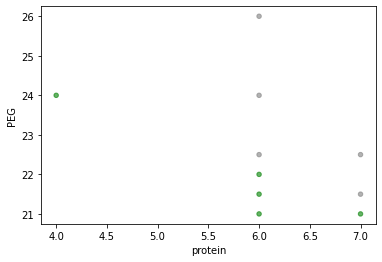

In [35]:
colordict= {'good':'green',
            'needles':'gray'}
df.plot.scatter('protein', 'PEG', alpha=0.6, c=df.quality.map(colordict))
plt.show()

### Other things of note
You may have noticed that values present in some rows, but not others, are harmlessly treated as `NaN` where missing.

To save a little bit of copy/pasting, the `clonetray()` method makes a copy of a tray, only changing whatever parameters you specify. You can override the cloned row or column gradient in the new tray by calling `setrows()` and/or `setcols()` with the new tray.

In [36]:
myscreen = clonetray(myscreen, 'tray2', 'tray2.1', date='2021-01-05')
df = well(myscreen, 'tray2.1', 'B1', 'good', quantity = 1, old_df=df)